In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_corridor


maze = gym.make('corridor-100-v0')


In [3]:
from lcs.agents.xcs import XCS, Configuration


# TODO: Move to /utils
def xcs_corridor_knowledge(xcs: XCS, environment):
    nr_correct = 0
    position = 0
    while environment.observation_space.contains(position):
        if any([True for cl in xcs.population if cl.does_match(str(position))]):
            nr_correct += 1
        position += 1
    return nr_correct / position


def xcs_corridor_metrics(xcs: XCS, environment):
    return {
        'population': sum(cl.numerosity for cl in xcs.population),
        'knowledge': xcs_corridor_knowledge(xcs, environment)
    }


cfg = Configuration(theta_mna=2, user_metrics_collector_fcn=xcs_corridor_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 500)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 86, 'reward': 1000, 'population': 172, 'knowledge': 0.86}


INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 63, 'reward': 1000, 'population': 199, 'knowledge': 0.67}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 63, 'reward': 1000, 'population': 199, 'knowledge': 0.59}


INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 94, 'reward': 1000, 'population': 199, 'knowledge': 0.76}


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 46, 'reward': 1000, 'population': 199, 'knowledge': 0.58}


INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 35, 'reward': 1000, 'population': 199, 'knowledge': 0.47}


INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 24, 'reward': 1000, 'population': 200, 'knowledge': 0.71}


INFO:lcs.agents.Agent:{'trial': 350, 'steps_in_trial': 99, 'reward': 1000, 'population': 199, 'knowledge': 0.74}


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 22, 'reward': 1000, 'population': 200, 'knowledge': 0.57}


INFO:lcs.agents.Agent:{'trial': 450, 'steps_in_trial': 5, 'reward': 1000, 'population': 197, 'knowledge': 0.68}


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 82, 'reward': 1000, 'population': 197, 'knowledge': 0.69}


INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 25, 'reward': 1000, 'population': 199, 'knowledge': 0.65}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 93, 'reward': 1000, 'population': 198, 'knowledge': 0.74}


INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 46, 'reward': 1000, 'population': 200, 'knowledge': 0.9}


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 18, 'reward': 1000, 'population': 198, 'knowledge': 0.58}


INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 70, 'reward': 1000, 'population': 200, 'knowledge': 0.65}


INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 14, 'reward': 1000, 'population': 196, 'knowledge': 0.64}


INFO:lcs.agents.Agent:{'trial': 350, 'steps_in_trial': 26, 'reward': 1000, 'population': 200, 'knowledge': 0.66}


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 13, 'reward': 1000, 'population': 199, 'knowledge': 0.69}


INFO:lcs.agents.Agent:{'trial': 450, 'steps_in_trial': 89, 'reward': 1000, 'population': 199, 'knowledge': 0.69}


Text(0, 0.5, 'steps for solution')

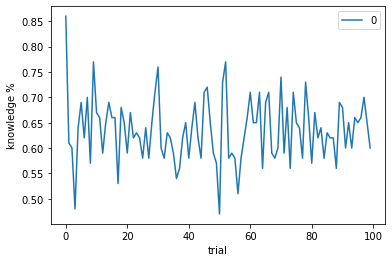

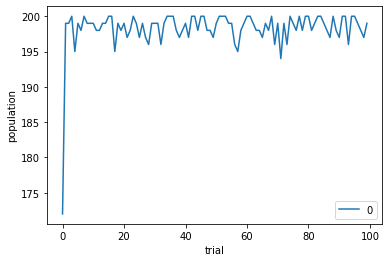

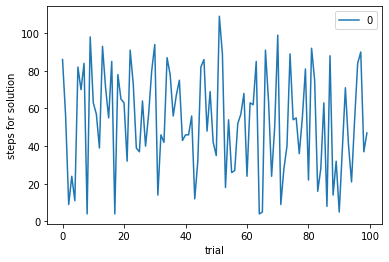

In [11]:
import pandas as pd

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")

df = pd.DataFrame(metric["population"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")

df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")





In [ ]:
# Based on my experiment. Following results should be repeatable after re-running of this file.

# Observation:
# Population raises to max value at the beginning of experiment
# Steps are random
# Knowledge reaches level close to max immediately

# Conclusion:
# Corridor is primary a test of Algorithm running.
# It does not provide sufficient data to determine proper function of algorithm
# Population almost immediately reaches default max population.
# Algorithm will not delete Classifiers until it will reach max population, which it does.
# Starting position of corridor is random therefore steps should have not resulted in any pattern 
# Knowledge follows the population. 

# Proposed Solution:
# Continue testing the XCS in other environment
# Lower metrics_trial_frequency to better see the changes in population

# Alternative Solution, I do not plan to implement it:
# normalize the steps by dividing steps_in_trial by distance to solution depending on starting position.
# requires taking note of starting position by XCS itself beyond TrialMetrics, therefore discarded as solution.


